# Agrupamento com K-Means com Python

O algoritmo K-means é uma técnica de aprendizado não supervisionado usada para agrupar dados em k clusters, onde k é um número predefinido de grupos.

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

In [4]:
# iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# previsores x classe
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [6]:
# padronizacao
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# modelo kmeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
iris_df['cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,1


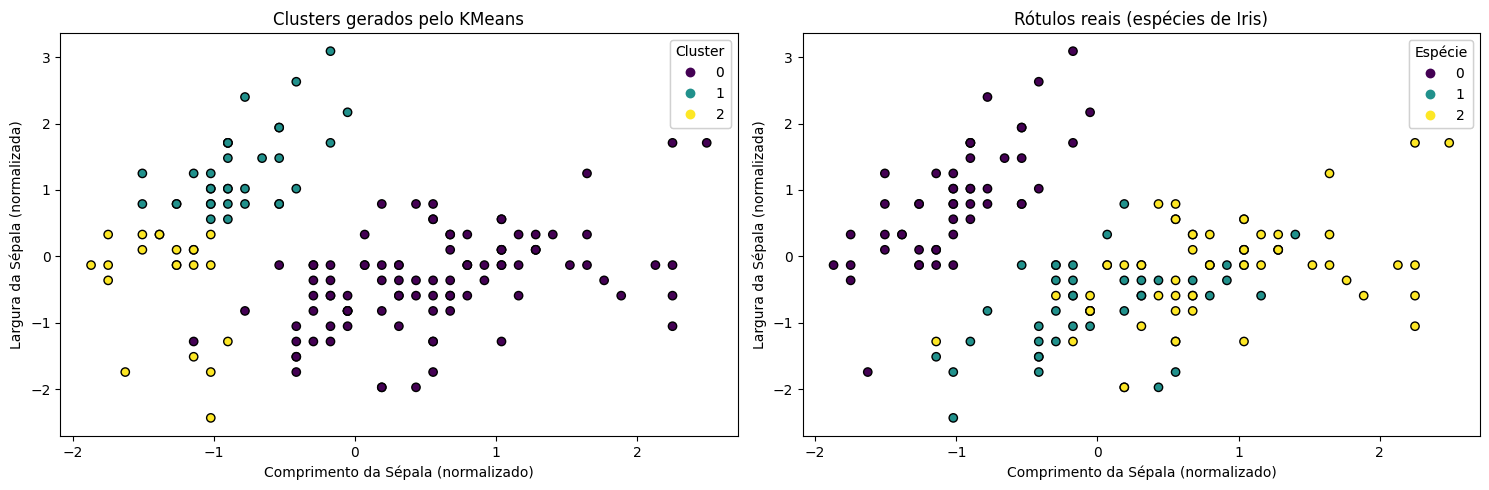

In [12]:
# visualizar clusters
fig, axs = plt.subplots(1,2, figsize=(15,5))

scatter1 = axs[0].scatter(X_scaled[:,0], X_scaled[:,1], c=iris_df['cluster'], cmap='viridis', edgecolor='k')
axs[0].set_title("Clusters gerados pelo KMeans")
axs[0].set_xlabel("Comprimento da Sépala (normalizado)")
axs[0].set_ylabel("Largura da Sépala (normalizada)")
legend1 = axs[0].legend(*scatter1.legend_elements(), title="Cluster")
axs[0].add_artist(legend1)

scatter2 = axs[1].scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='viridis', edgecolor='k')
axs[1].set_title("Rótulos reais (espécies de Iris)")
axs[1].set_xlabel("Comprimento da Sépala (normalizado)")
axs[1].set_ylabel("Largura da Sépala (normalizada)")
legend2 = axs[1].legend(*scatter2.legend_elements(), title="Espécie")
axs[1].add_artist(legend2)

plt.tight_layout()
plt.show()

In [15]:
# avaliando com indice de silhueta
score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print(f"Índice de Silhueta:  {score:.3f}")

Índice de Silhueta:  0.480


In [16]:
# comparando cluster x rotulos
pd.crosstab(iris_df['cluster'],y)

target,0,1,2
cluster,,,
0,0,46,50
1,33,0,0
2,17,4,0
